### Decision Tree Example
+ Duct Tape, or...
+ WD-40

In [1]:
import pandas as pd

df = pd.read_csv("DIMSIM.csv")
#df.columns = ['Item', 'DIM', 'SIM', 'mechanical', 'metal', 'Solution']

pd.options.display.max_columns = 999

In [2]:
df.head()

,Item,DIM,SIM,mechanical,metal,Solution
0,door,no,yes,no,yes,WD40
1,chair,yes,no,no,yes,Duct tape
2,table,yes,no,no,yes,Duct tape
3,wheel,no,yes,yes,yes,WD40
4,cup,no,no,no,no,Duct tape


In [4]:
Y = df['Solution']

Y1 = pd.get_dummies(Y)['Duct tape'].as_matrix()

In [6]:
Y1

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1], dtype=uint8)

In [7]:
X = df[['DIM', 'SIM', 'mechanical', 'metal']]

X = df[['DIM','metal']]

X1 = X.replace({'yes':1, "no":0}).as_matrix()

In [8]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X1, Y1)

In [ ]:
df

### Plot  Decision Tree Solution

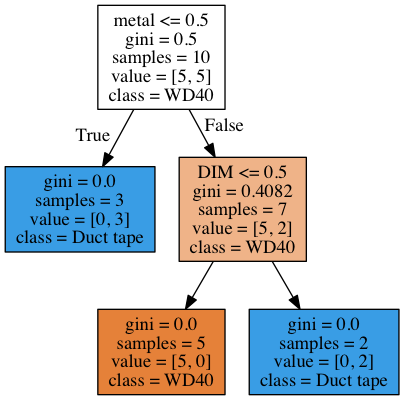

In [9]:
from IPython import display
from sklearn import datasets, tree, utils
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn import tree


clf = tree.DecisionTreeClassifier()
clf.fit(X1, Y1)

tree_clf = clf

# Generate a plot of the decision tree
dot_data = StringIO() 
tree.export_graphviz(tree_clf, 
                     class_names =df.Solution.tolist(),
                     feature_names = X.columns.tolist(), out_file=dot_data, 
                    filled=True, ) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

display.Image(graph.create_png())

In [10]:
import numpy as np

## Predict Suit of Armor
## DIM:1, METAL:1

test = np.matrix([1, 1])

clf.predict(test)

array([1], dtype=uint8)

### In Class Assignment: 
+ Graph Decision Tree for Iris Dataset

In [12]:
from sklearn.datasets import load_iris
iris = datasets.load_iris()

In [72]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
from sklearn import tree
import pandas as pd

print "IT DOES NOT FAIL ANYMORE YOU CAN'T STOP ME"

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target



IT DOES NOT FAIL ANYMORE YOU CAN'T STOP ME


In [15]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Note! PLEASE illustrate your tree graphically
- Check out the code above for an example


In [26]:
X = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris.target

clf = tree.DecisionTreeClassifier()
clf.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [39]:
outcomenames = df_iris['target'].apply(lambda x: str(x)).tolist()

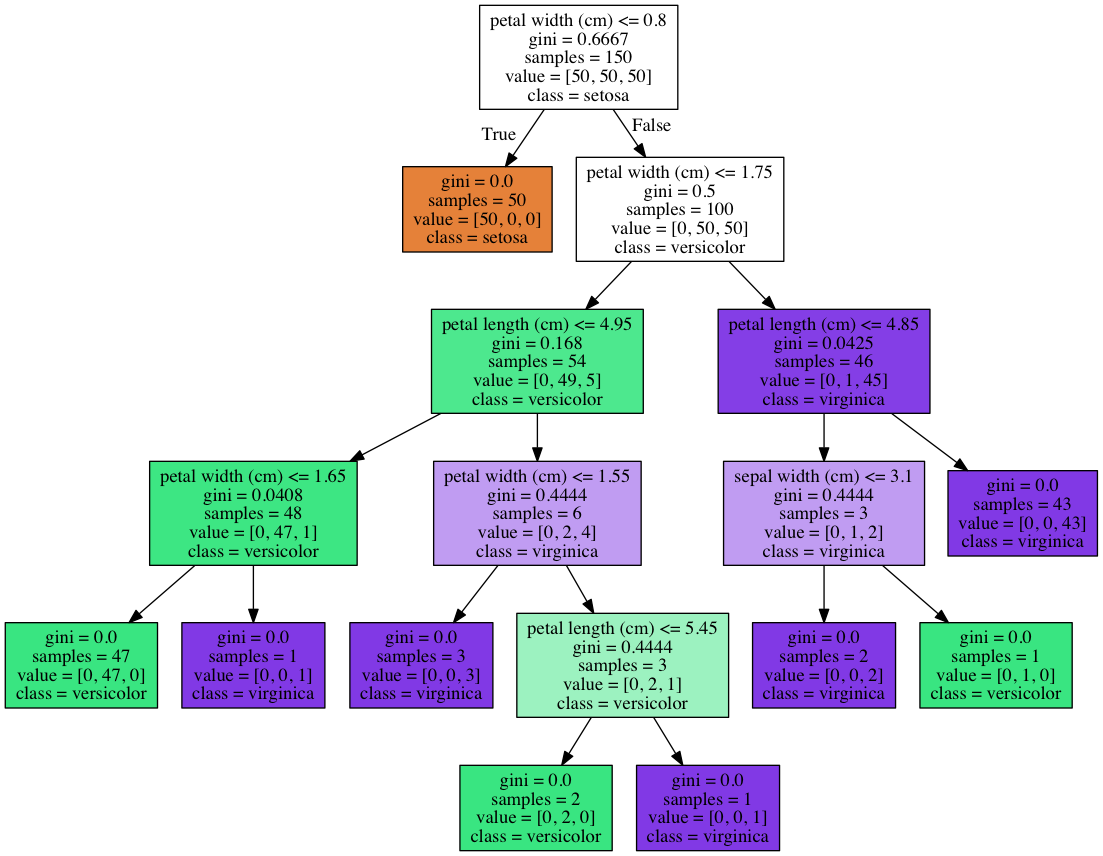

In [71]:

# Generate a plot of the decision tree
dot_data = StringIO() 
tree.export_graphviz(clf, 
                     class_names=iris.target_names,
                     feature_names = X.columns.tolist(), out_file=dot_data, 
                    filled=True, ) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

display.Image(graph.create_png())

### Question: What is this this code doing?

+ Can you modify the code to get a different result?

In [64]:
clf.predict(np.matrix([1, 2, 1, 1]))

array([1])

### Find AUC for your decision tree

+ How does your AUC look?

+ Why do you think this is the case?

+ You have 3 outcomes

- Think of two ways to compute AUC

- Look at the documentation for roc_auc_score in sklearn.metrics

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [100]:
from sklearn.metrics import roc_auc_score

roc_auc_score(pd.get_dummies(y)[0], clf.predict_proba(X)[:, 0])



1.0


y_true = the actual y values

y_score = probabilities of belonging to class

roc_auc_score(y_true, y_score)

### Plot  Decision Tree Solution

### Bonus: Plot an ROC curve!

Try to install this:

https://github.com/reiinakano/scikit-plot

### How does the ROC curve look?

+ Why do you think this is the case?

+ does this differ from above?

/Users/Reid/anaconda/lib/python2.7/site-packages/scikit_plot-0.2.2-py2.7.egg/scikitplot/classifiers.py:51: UserWarning: "plot_roc_curve" method already in clf. Overriding anyway. This may result in unintended behavior.
/Users/Reid/anaconda/lib/python2.7/site-packages/scikit_plot-0.2.2-py2.7.egg/scikitplot/classifiers.py:51: UserWarning: "plot_precision_recall_curve" method already in clf. Overriding anyway. This may result in unintended behavior.
/Users/Reid/anaconda/lib/python2.7/site-packages/scikit_plot-0.2.2-py2.7.egg/scikitplot/classifiers.py:51: UserWarning: "plot_feature_importances" method already in clf. Overriding anyway. This may result in unintended behavior.
/Users/Reid/anaconda/lib/python2.7/site-packages/scikit_plot-0.2.2-py2.7.egg/scikitplot/classifiers.py:51: UserWarning: "plot_confusion_matrix" method already in clf. Overriding anyway. This may result in unintended behavior.
/Users/Reid/anaconda/lib/python2.7/site-packages/scikit_plot-0.2.2-py2.7.egg/scikitplot/classi

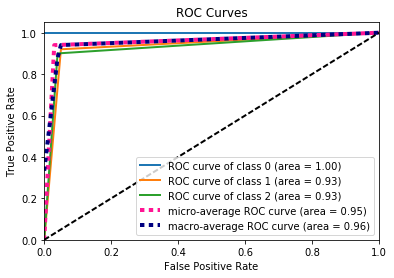

In [84]:
%matplotlib inline

# This is all that's needed for scikit-plot
import matplotlib.pyplot as plt
from scikitplot import classifier_factory

classifier_factory(clf)

clf.plot_roc_curve(X.as_matrix(), y, random_state=2)
plt.show()